In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();

/Users/BadWizard/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
df = pd.read_excel('../data/coalpublic2013.xls',header=2,index_col=1)
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [17]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary', 'Contractor'], dtype=object)

In [18]:
df['Company Type'].replace(to_replace = 'Indepedent Producer Operator',
                           value = 'Independent Producer Operator',
                           inplace = True)

In [19]:
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103404    Independent Producer Operator
100759    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
Name: Company Type, dtype: object

In [40]:
df.rename(columns=lambda x: x.replace(" ","_"),inplace=True)

In [41]:
df.columns

Index(['Year', 'Mine_Name', 'Mine_State', 'Mine_County', 'Mine_Status',
       'Mine_Type', 'Company_Type', 'Operation_Type', 'Operating_Company',
       'Operating_Company_Address', 'Union_Code', 'Coal_Supply_Region',
       'Production_(short_tons)', 'Average_Employees', 'Labor_Hours'],
      dtype='object')

In [39]:
df1 = df.copy()
df1.rename(columns = lambda x: x.replace('Mine','Yours'),inplace=True)
df1.head()

,Year,Yours_Name,Yours_State,Yours_County,Yours_Status,Yours_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company Address,Union_Code,Coal_Supply Region,Production_(short tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [32]:
df.shape

(1450, 15)

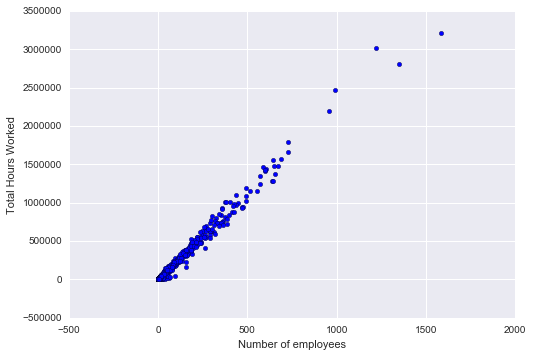

In [35]:
plt.scatter(df.Average_Employees,df.Labor_Hours)
plt.xlabel('Number of employees')
plt.ylabel('Total Hours Worked')

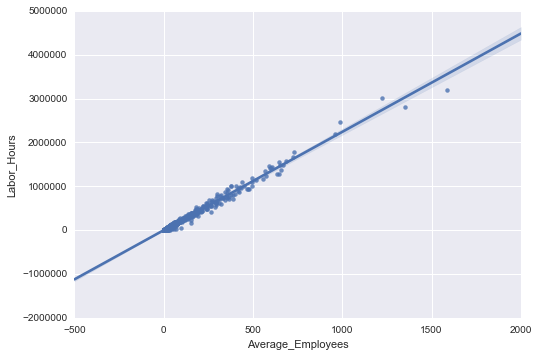

In [37]:
sns.regplot(df.Average_Employees,df.Labor_Hours)
plt.savefig("../figures/2016-04-05" + "-employees_vs_hours.png")

In [42]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


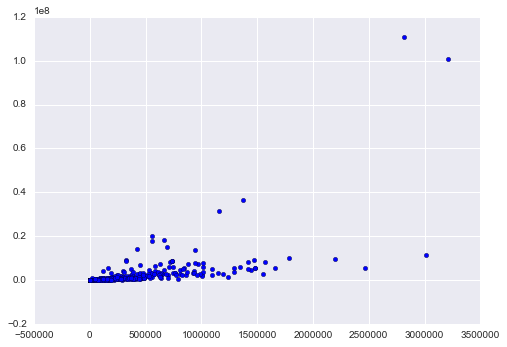

In [43]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'])

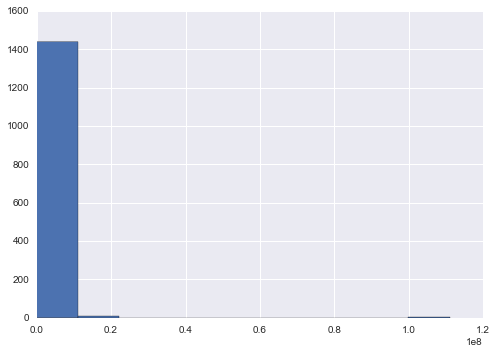

In [44]:
 df['Production_(short_tons)'].hist()

In [45]:
min(df['Production_(short_tons)'])

0

In [61]:
df[df['Production_(short_tons)']==0].shape

(389, 15)

In [62]:
df[df['Production_(short_tons)']>0]

(1061, 15)

In [63]:
# we are removing data here !
df = df[df['Production_(short_tons)']>0]

In [66]:
 df['log_production'] = np.log(df['Production_(short_tons)'])

/Users/BadWizard/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


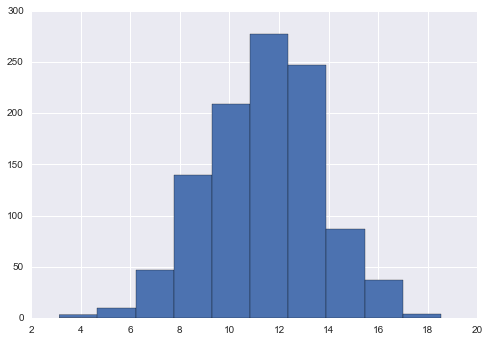

In [67]:
df.log_production.hist()

In [68]:
df.to_csv('../data/cleaned_coalpublic2013.csv')